<a href="https://colab.research.google.com/github/ReginaldMordi/Adv-Machine-Learning/blob/main/R_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
library(ggplot2)
library(tidyverse)
library(tensorflow)
library(cowplot)
library(keras)

# Importing IMDB movie reviews dataset and we only keep the top 10,000 most frequently occurring words in the training data.
imdb <- dataset_imdb(num_words = 10000)
c(c(train_data, train_labels), c(test_data, test_labels)) %<-% imdb

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:

# Converting my data to binary data
vectorize_sequences <- function(sequences, dimention = 10000) { 
    # Create an all-zero matrix of shape (len(sequences), dimension)
  results <- matrix(0, nrow = length(sequences), ncol= dimention)
  for(i in 1:length(sequences))
        # Sets specific indices of results[i] to 1s
  results[i, sequences[[i]]] <- 1
  results
}

x_train <- vectorize_sequences(train_data)  # vectorized training data
x_test <- vectorize_sequences(test_data)    # vectorized test data
# vectoring the labels
y_train <- as.numeric(train_labels)
y_test <- as.numeric(test_labels)
# structure of the vectorized samples
str(x_train[1,])

# Validating my approach
## Setting apart 10,000 samples from the original training data for validation

val_indices <- 1:10000
x_val <- x_train[val_indices,]
partial_x_train <- x_train[-val_indices,]
y_val <- y_train[val_indices]
partial_y_train <- y_train[-val_indices]

 num [1:10000] 1 1 0 1 1 1 1 1 1 0 ...


In [3]:
model1 <- keras_model_sequential() %>% 
  layer_dense(units = 16, activation = "relu", input_shape = c(10000)) %>% 
  layer_dense(units = 16, activation = "relu") %>% 
  layer_dense(units = 1, activation = "sigmoid")
model1 %>% compile(
  optimizer = "rmsprop",
  loss = "binary_crossentropy",
  metrics = c("accuracy"))
history <- model1 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 12,
  batch_size = 512,
  validation_data = list(x_val, y_val))

loss accuracy 
0.105736 0.868000

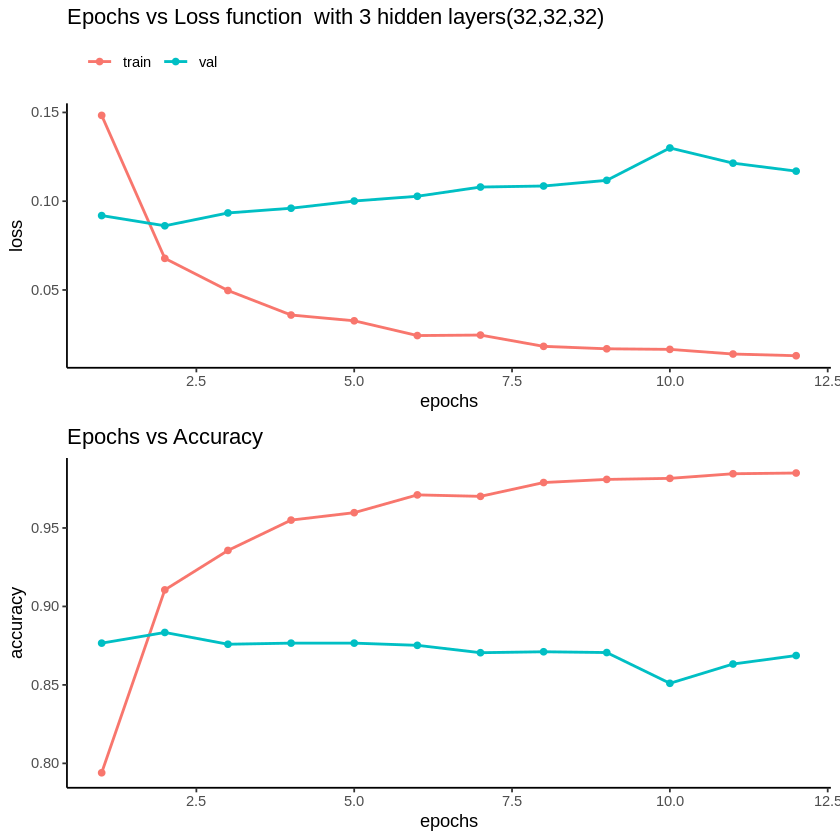

In [4]:
# Building our network 
# Using 3 hidden layers with 32, 32, 32 units, tanh activation function, batch size 512, 20 epoch.

model333 <- keras_model_sequential() %>% 
  layer_dense(units = 32, activation = "tanh", input_shape = c(10000)) %>%
  layer_dense(units = 32, activation = "tanh") %>%
  layer_dense(units = 32, activation = "tanh") %>%
  layer_dense(units = 1, activation = "sigmoid")
model333 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
history_3_layer32 <- model333 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 12,
  batch_size = 512,
  validation_data = list(x_val, y_val))

# Let's train a new network from scratch for 4 epochs and then evaluate it on the test data.

model3331 <- keras_model_sequential() %>% 
  layer_dense(units = 32, activation = "tanh", input_shape = c(10000)) %>%
  layer_dense(units = 32, activation = "tanh") %>%
  layer_dense(units = 32, activation = "tanh") %>%
  layer_dense(units = 1, activation = "sigmoid")

model3331 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))

model3331 %>% fit(x_train, y_train, epochs = 5, batch_size = 512)
results1 <- model3331 %>% evaluate(x_test, y_test)
results1

# Visualizing the model331 output of loss function and accuracy
model331.df <- as.data.frame(history_3_layer32$metrics)
names(model331.df) <- c("train_loss","train_accuracy","val_loss","val_accuracy")
model331.df <- model331.df %>% mutate(epochs=1:n()) %>% gather("split","values",-epochs) %>% separate(split,c("split","metric")) %>% spread(metric,values)
p1<-ggplot(model331.df) + geom_line(aes(x=epochs,y=loss,color=split),size=0.8)+geom_point(aes(x=epochs,y=loss,color=factor(split)),size=1.5)+ggtitle("Epochs vs Loss function  with 3 hidden layers(32,32,32)")+theme(panel.grid = element_blank(),panel.background = element_blank())+theme_classic()+theme(legend.position = 'top',legend.justification = 'left',legend.title = element_blank())
p2<-ggplot(model331.df) + geom_line(aes(x=epochs,y=accuracy,color=split),size=0.8,show.legend = F)+geom_point(aes(x=epochs,y=accuracy,color=split),size=1.5,show.legend = F)+ggtitle("Epochs vs Accuracy")+theme(panel.grid = element_blank(),panel.background = element_blank())+theme_classic()
plot_grid(p1,p2,nrow = 2)



In [6]:

# Using 3 hidden layers with 64, 32, 16 units, tanh activation function, batch size 512, 20 epoch.
model632 <- keras_model_sequential() %>% 
  layer_dense(units = 64,kernel_regularizer = regularizer_l1(0.001), activation = "tanh",input_shape = c(10000)) %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 32,kernel_regularizer = regularizer_l1(0.001), activation = "tanh") %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 16,kernel_regularizer = regularizer_l1(0.001), activation = "tanh") %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 1, activation = "sigmoid")
model632 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
history_3 <- model632 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 12,
  batch_size = 512,
  validation_data = list(x_val, y_val))

# Training a new network from scratch for 4 epochs and then evaluate it on the test data.

model6313 <- keras_model_sequential() %>% 
  layer_dense(units = 64, activation = "tanh",input_shape = c(10000)) %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 32, activation = "tanh") %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 16, activation = "tanh") %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 1, activation = "sigmoid")
model6313 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
model6313 %>% fit(x_train, y_train, epochs = 4, batch_size = 512)
results4 <- model6313 %>% evaluate(x_test, y_test)
results4

loss   accuracy 
0.09390821 0.88352001

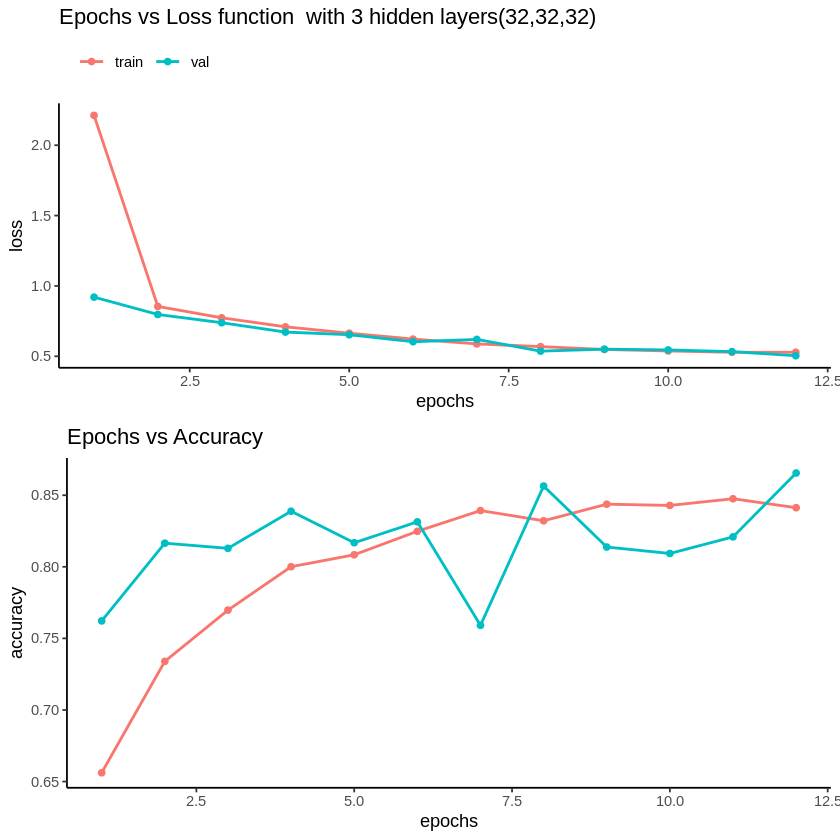

In [7]:
# Visualizing the model6313 output of loss function and accuracy
model6313.df <- as.data.frame(history_3$metrics)
names(model6313.df) <- c("train_loss","train_accuracy","val_loss","val_accuracy")
model6313.df <- model6313.df %>% mutate(epochs=1:n()) %>% gather("split","values",-epochs) %>% separate(split,c("split","metric")) %>% spread(metric,values)
p1<-ggplot(model6313.df) + geom_line(aes(x=epochs,y=loss,color=split),size=0.8)+geom_point(aes(x=epochs,y=loss,color=factor(split)),size=1.5)+ggtitle("Epochs vs Loss function  with 3 hidden layers(32,32,32)")+theme(panel.grid = element_blank(),panel.background = element_blank())+theme_classic()+theme(legend.position = 'top',legend.justification = 'left',legend.title = element_blank())
p2<-ggplot(model6313.df) + geom_line(aes(x=epochs,y=accuracy,color=split),size=0.8,show.legend = F)+geom_point(aes(x=epochs,y=accuracy,color=split),size=1.5,show.legend = F)+ggtitle("Epochs vs Accuracy")+theme(panel.grid = element_blank(),panel.background = element_blank())+theme_classic()
plot_grid(p1,p2,nrow = 2)
